多層感知機 Multilayer perceptron, MLP
(使用mnist資料集)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import keras
from keras.datasets.mnist import load_data


Using TensorFlow backend.


In [0]:
# ((訓練題目, 訓練答案), (測試題目, 測試答案))
load_data()


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
((x_train, y_train), (x_test, y_test)) = load_data()

# 一定要做步驟，看一下訓練資料、測試資料有幾筆
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


6


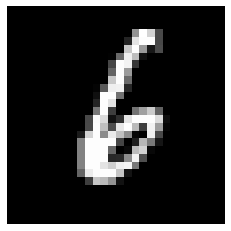

In [0]:
import matplotlib.pyplot as plt
import random

%matplotlib inline

c = random.randint(0, 5999)
print(y_train[c])

plt.axis("off")
plt.imshow(x_train[c], cmap="gray")


In [0]:
import pandas as pd

pd.DataFrame(x_train[c])


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,212,73,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,253,72,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,23,75,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
"""
資料預處理
1. 題目預處理(Normalize)
   keras在準備隨機那組weights，跟Normalize的圖片較搭
   第一種方式: 0 ~ 1，在這裡用此方式
   第二種方式: -1 ~ 1
   攤開 -> keras MLP 規定一定要攤開成為1D
"""

x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

# Demo
x_train_shape[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
"""
2. 答案預處理(One-hot encoding)
   希望的樣子:[P0, P1, ..., P9]
   ex. 5: 可能輸出 -> [0, 0, 0, 0.2, 0, 0.8, 0, 0, 0, 0]
"""

from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Demo
print("原來：",y_train[0])
print("後來：",y_train_cat[0])


原來： 5
後來： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
"""
建立模型
   第一種:蛋糕支架(Sequential), 堆上一層(Layers)
   Layers: Dense(全連接層)
"""

from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()

# 第一層: input_dim -> 告訴模型輸入有幾個
# param: 784 * 128(神經元的連結) + 128(128個輸出, 128個激活 -> 128個偏差(bias)) = 100480
mlp.add(Dense(128, activation="relu", input_dim=784))

# param: 128 * 10 + 10(bias) = 1290
mlp.add(Dense(10, activation="softmax"))

mlp.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
"""
確定模型訓練方式...等
   隨機(隨便選一組Weights)梯度(正確方向)下滑
   loss: 最後輸出一個 -> binary_crossentropy
         最後輸出多個 -> categorical_crossentropy
   metrics: 為多輸出的項目(accuracy正確率)，以供參考
   optimizer: 下降的時候優化 -> 基於動量(在走的時候不是等速度，而是有速度的累積)
"""

mlp.compile(loss="categorical_crossentropy", 
            metrics=["accuracy"], 
            optimizer="adam")


In [0]:
"""
訓練模型
   batch: 看幾筆(200)做一次梯度下降(修正)
   epochs: 整份測試集看幾次(10)
   10個epochs，200 batch: 60000 * 10 / 200 -> 3000(次梯度下降)
"""

mlp.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=14, 
        validation_split=0.1, 
        verbose=2)



Train on 54000 samples, validate on 6000 samples
Epoch 1/14
 - 1s - loss: 0.4302 - accuracy: 0.8844 - val_loss: 0.1864 - val_accuracy: 0.9515
Epoch 2/14
 - 1s - loss: 0.1943 - accuracy: 0.9441 - val_loss: 0.1364 - val_accuracy: 0.9633
Epoch 3/14
 - 1s - loss: 0.1444 - accuracy: 0.9585 - val_loss: 0.1143 - val_accuracy: 0.9687
Epoch 4/14
 - 1s - loss: 0.1150 - accuracy: 0.9670 - val_loss: 0.1009 - val_accuracy: 0.9723
Epoch 5/14
 - 1s - loss: 0.0957 - accuracy: 0.9719 - val_loss: 0.0930 - val_accuracy: 0.9740
Epoch 6/14
 - 1s - loss: 0.0790 - accuracy: 0.9775 - val_loss: 0.0876 - val_accuracy: 0.9743
Epoch 7/14
 - 1s - loss: 0.0687 - accuracy: 0.9801 - val_loss: 0.0834 - val_accuracy: 0.9753
Epoch 8/14
 - 1s - loss: 0.0585 - accuracy: 0.9831 - val_loss: 0.0822 - val_accuracy: 0.9750
Epoch 9/14
 - 1s - loss: 0.0510 - accuracy: 0.9857 - val_loss: 0.0808 - val_accuracy: 0.9770
Epoch 10/14
 - 1s - loss: 0.0453 - accuracy: 0.9868 - val_loss: 0.0773 - val_accuracy: 0.9770
Epoch 11/14
 - 1s -

In [0]:
"""
evaluate評估函式
"""

mlp.evaluate(x_test_shape, y_test_cat)


10000/10000 [==============================] - 0s 18us/step


[0.07569415408868808, 0.9775999784469604]

In [0]:
"""
混淆矩陣
"""

# predict: 機率 、 predict_classes: 分類
pre = mlp.predict_classes(x_test_shape)

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))


,0,1,2,3,4,5,6,7,8,9
0,967,0,1,0,2,0,4,1,5,0
1,0,1120,2,3,0,0,2,1,7,0
2,3,1,1001,1,2,0,2,7,13,2
3,0,0,3,987,0,3,1,5,7,4
4,1,0,3,1,964,0,2,1,2,8
5,3,0,0,9,1,862,8,0,7,2
6,3,2,1,1,3,2,944,0,2,0
7,1,4,9,3,1,0,0,999,5,6
8,1,1,1,2,4,1,2,3,956,3
9,1,4,0,7,9,3,1,3,5,976


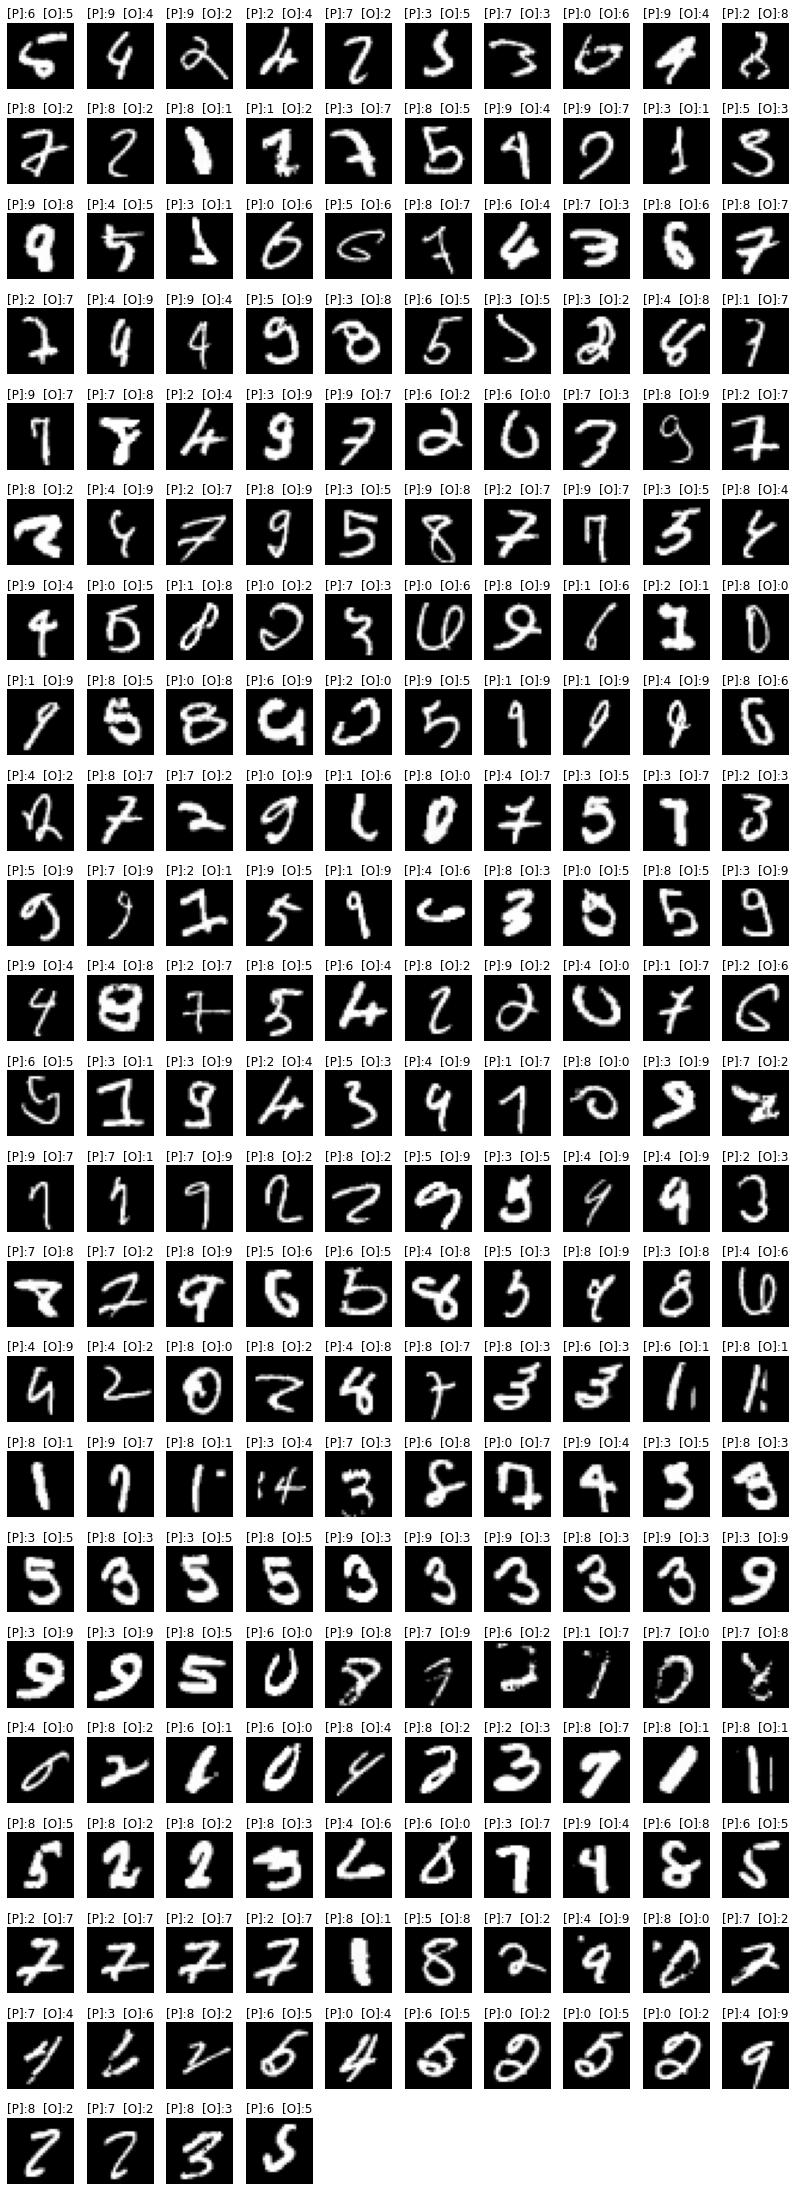

In [0]:
# numpy才能這樣直接每個數字比較
import numpy as np

# list: list[索引]
# numpy array: nparray[ [多個數字] ]
diff = np.nonzero(pre != y_test)[0]

# 預測錯誤的圖之原本標籤
orifalse = y_test[diff]

# 預測錯誤的圖之預測標籤
prefalse = pre[diff]

# 把圖拿出來
imgfalse = x_test[diff]

# 整張圖的 寬, 高
plt.figure(figsize=(14, 40))

# 設定subplot在整張圖的 寬/高 layout分佈 
width = 10
height = int(len(imgfalse) / 10) + 1

for i, img in enumerate(imgfalse):
    # (列數, 行數, 第幾張圖(i開始))
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[P]:" + str(prefalse[i]) + "  [O]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img, cmap="gray")
